# Лабораторная работа #3
### Варламов Никита, М33361; Гайнанов Ильдар, М33371;

# Task 1

Предъявите доверительный интервал уровня $1 - \alpha$ для указанного параметра при данных предположениях (с математическими обоснованиями). Сгенерируйте 2 выборки объёма 25 и посчитайте доверительный интервал. Повторить 1000 раз. Посчитайте, сколько раз 95-процентный доверительный интервал покрывает реальное значение параметра. То же самое сделайте для объема выборки 10000. Как изменился результат? Как объяснить?
Задача представлена в 4 вариантах. Везде даны две независимые выборки $X, Y$ из нормальных распределений $\mathcal{N} (\mu_1, \sigma_1^2), \mathcal{N} (\mu_2, \sigma_2^2)$ объема $n, m$ соответственно. Сначала указывается оцниваемая функция, потом данные об остальных параметрах, затем параметры эксперимента и подсказки.

Оцениваем $\tau = \mu_1 - \mu_2$. Известны $\sigma_1^2, \sigma_2^2$.
Для эксперимента берём $\mu_1 = 2, \mu_2 = 1$

Построим доверительный интервал по определению для функции статистики $\frac{\overline{X} - \overline{Y} - \tau}{\sigma}$. Очевидно, что она распределена по $\mathcal{N} (0, 1)$ ($\overline{X} \sim \mathcal{N} \left(\mu_1, \frac{\sigma_1^2}{n}\right)$, $\overline{Y} \sim \mathcal{N} \left(\mu_2, \frac{\sigma_2^2}{n}\right)$, $\overline{X} - \overline{Y} \sim \mathcal{N} \left(\mu_1 - \mu_2, \frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{n}\right), \ldots$

По определению (квантили одинаковые, тк у нас нормальное распределение):

$P\left(-q_{1-\frac{\alpha}{2}} \le \frac{\overline{X} - \overline{Y} - \tau}{\sigma} \le q_{1-\frac{\alpha}{2}}\right) = 1 - \alpha$

Выражаем $\tau$:

$P\left(\tau \in \left[\overline{X} - \overline{Y} -q_{1-\frac{\alpha}{2}} \sigma, \overline{X} - \overline{Y} +q_{1-\frac{\alpha}{2}} \sigma\right] \right)$

Проводим эксперимент:

In [62]:
import numpy as np
import pandas as pd
from scipy.stats import norm

ns = [25, 10000]

tau1 = 2
tau2 = 1

sigma1 = 1
sigma2 = 0.5

def experiment(n, count=1000):
    dataX = np.random.normal(loc=tau1, scale=sigma1, size=(count, n))
    dataY = np.random.normal(loc=tau2, scale=sigma2, size=(count, n))
    
    meanX = dataX.mean(axis=1)
    meanY = dataY.mean(axis=1)
    
    quantile = norm.ppf(0.95, loc=0, scale=1)
    sigma = np.sqrt(sigma1 / n + sigma2 / n)
    
    df = pd.DataFrame()
    df['lower_bound'] = meanX - meanY - quantile * sigma
    df['upper_bound'] = meanX - meanY + quantile * sigma
    df['includes'] = ((df['lower_bound'] <= 1) & (df['upper_bound'] >= 1)).astype(bool)
 
    return df

In [63]:
e25 = experiment(25)
e25

,lower_bound,upper_bound,includes
0,0.892796,1.698607,True
1,0.647494,1.453305,True
2,0.365521,1.171332,True
3,0.289401,1.095211,True
4,0.380920,1.186730,True
...,...,...,...
995,0.767099,1.572909,True
996,0.949003,1.754813,True
997,1.351209,2.157019,False
998,0.455784,1.261594,True


In [64]:
"1 in interval", len(e25[e25['includes'] == True])

('1 in interval', 931)

In [65]:
e10000 = experiment(10000)
e10000

,lower_bound,upper_bound,includes
0,0.982383,1.022673,True
1,0.982126,1.022416,True
2,0.972023,1.012313,True
3,0.969902,1.010192,True
4,0.991648,1.031939,True
...,...,...,...
995,0.976549,1.016839,True
996,0.978208,1.018498,True
997,0.983271,1.023561,True
998,0.976703,1.016994,True


In [61]:
"1 in interval", len(e10000[e10000['includes'] == True])

('1 in interval', 941)

Как можно видеть, оценка достаточно точная в обоих экспериментах (посмотрели количество интервалов, в которые попадает 1 ($\mu_1 - \mu_2$)). Однако, сильно отличется длина интервала:

In [54]:
(e25['upper_bound'] - e25['lower_bound']).mean()

0.960182335271062

In [55]:
(e10000['upper_bound'] - e10000['lower_bound']).mean()

0.04800911676355303

# Task 2



Найдите байесовскую оценку параметра $\theta$ (относительно среднеквадратической ошибки). Проведите эксперимент по схожей схеме, что и в предыдущей задаче.
Сами варианты (сначала указывается семейство распределений для выборки, затем априорное распределение параметра, в конце значения параметров для эксперимента):

1. $\mathcal{N}(\theta, b^2); \mathcal{N}(\mu, \sigma^2); b = \sigma = 1, \,\, \mu = 0$

![image](lab2_static/scan1.jpeg)
![image](lab2_static/scan2.jpeg)
![image](lab2_static/scan3.jpeg)


Итого, при значениях для эксперимента мы получаем, что $\theta^{*} = \frac{n}{n + 1}\sum{x_i}$

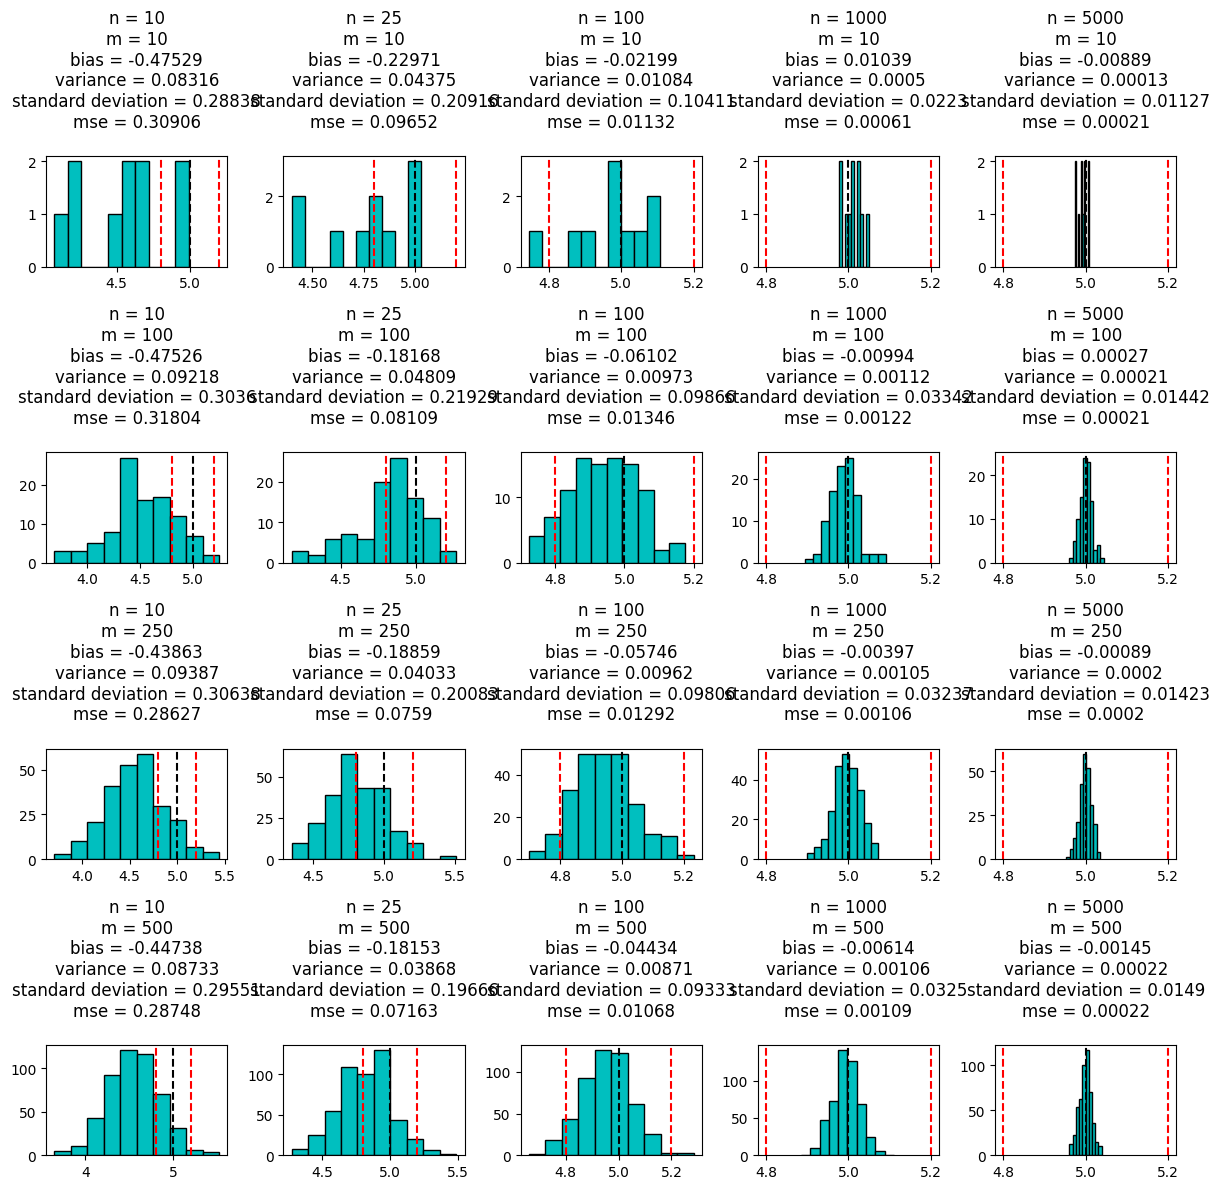

In [8]:
import matplotlib.pyplot as plt

true_theta_2 = 5

def bayesian_estimator(x):
    return x.size * x.mean() / (x.size + 1)

ns = [10, 25, 100, 1000, 5000]

fig, axs = plt.subplots(len(ms), len(ns), figsize=(12, 12))
i = 0

for m in ms:
    for n in ns:
        data = np.random.normal(loc=true_theta_2, scale=1, size=(m, n))
        thetas = np.array([bayesian_estimator(data[j]) for j in range(m)])

        bias = np.mean(thetas) - true_theta_2
        var = np.var(thetas)
        std = np.std(thetas)
        mse = np.mean((thetas - true_theta_2) ** 2)


        axs.flatten()[i].hist(thetas, color="c", edgecolor="k")
        axs.flatten()[i].set_title(
            f"""n = {n}\n"""
            f"""m = {m}\n"""
            f"""bias = {round(bias, 5)}\n"""
            f"""variance = {round(var, 5)}\n"""
            f"""standard deviation = {round(std, 5)}\n"""
            f"""mse = {round(mse, 5)}\n"""
        )
        axs.flatten()[i].axvline(true_theta_2, color="k", linestyle="dashed")
        axs.flatten()[i].axvline(true_theta_2 + threshold, color="r", linestyle="dashed")
        axs.flatten()[i].axvline(true_theta_2 - threshold, color="r", linestyle="dashed")
        i += 1
fig.tight_layout()